<a href="https://colab.research.google.com/github/AshbeeKim/AshbeeKim-1/blob/main/Test_on_20210715_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 빅데이터 분석 기획
-- dataset : https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [ ]:
import os
from google.colab import drive
ROOT = "/content/drive"
drive.mount(ROOT)

from os.path import join
MY_GOOGLE_DRIVE_PATH = "MyDrive/Task/"

KAGGLE = ".kaggle"
KAGGLE_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH, KAGGLE)
os.environ['KAGGLE_CONFIG_DIR'] = KAGGLE_PATH
!pip install --upgrade --force-reinstall --no-deps kaggle
# %cd "{KAGGLE_PATH}"

PROJECT = "CustomerSegmentation"
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH, PROJECT)
# !mkdir "{PROJECT_PATH}"
%cd "{PROJECT_PATH}"

# !kaggle datasets list -s customer-segmentation-tutorial-in-python
# !kaggle datasets download -d customer-segmentation-tutorial-in-python
# !unzip Mall_Customer_Segmentation_Data .zip
# !rm Mall_Customer_Segmentation_Data .zip

Mounted at /content/drive
     |████████████████████████████████| 61kB 6.0MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=d03d35f5c851ad3df6953c673756b5b07f626149304a164fba4c7f0b93b716da
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
/content/drive/.shortcut-targets-by-id/1srYR8TqwFsUSR4BYzQtIBmWUKrEBjd44/Task/CustomerSegmentation


In [ ]:
import time
import random
import re
import math
import itertools

import csv
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display as dp
from IPython import display

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(f"{PROJECT_PATH}/Mall_Customers.csv", encoding="UTF-8")

## Q1. 각 속성의 통계량을 확인하고 해석하시오.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df.Gender = df.Gender.map({'Male' : 0, 'Female' : 1})

In [ ]:
df_col = [col for col in df.columns]

Distribution and Outlier of CustomerID


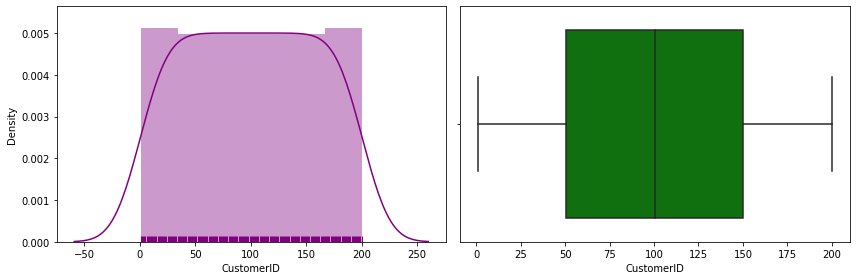

Distribution and Outlier of Gender


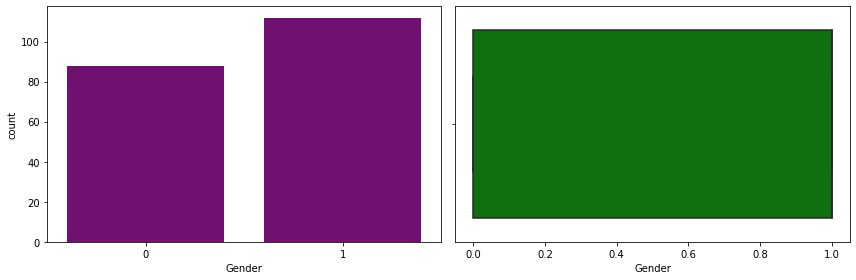

Distribution and Outlier of Age


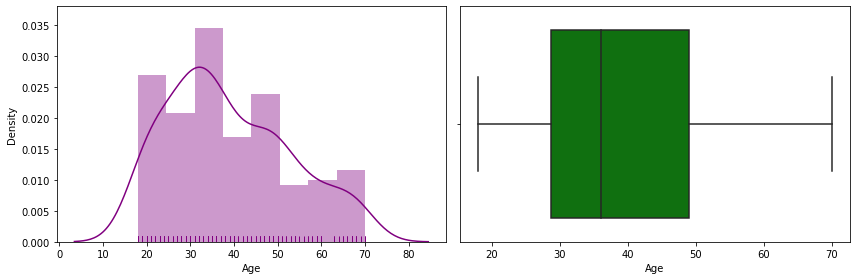

Distribution and Outlier of Annual Income (k$)


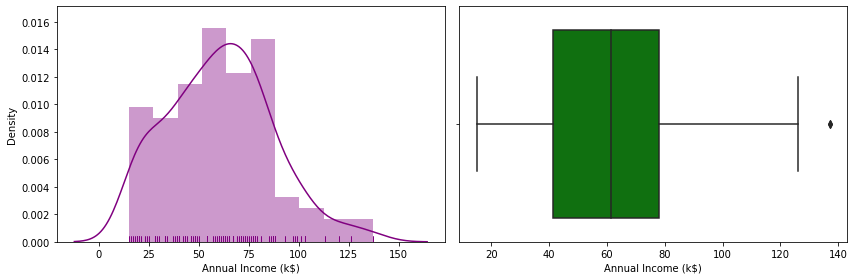

Distribution and Outlier of Spending Score (1-100)


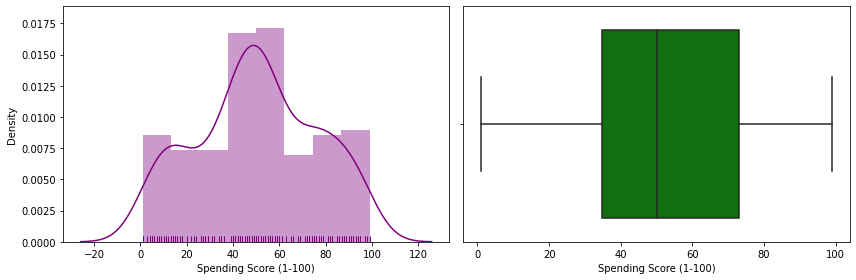

<IPython.core.display.Javascript object>

In [ ]:
for col in df_col:
  print(f"Distribution and Outlier of {col}")
  f, ax = plt.subplots(ncols=2, figsize=(12, 4))
  if len(df[col].unique())<5:
    sns.countplot(df[col], color='purple', ax=ax[0])
  else:
    sns.distplot(df[col], color='purple', rug=True, ax=ax[0])
  sns.boxplot(df[col], color='green', ax=ax[1])
  plt.tight_layout()
  plt.show()

display.Javascript("google.colab.output.setIframeHeight('750px');")

square 형태를 띄고 있는 customerID는 논외로 간주(이유 : 고객소비지수?를 예측한 뒤, 팔로우업을 하기 위한 identificational한 변수로 생각됨)

age의 분포를 보면, MZ-세대(10대 이하가 적은 것을 보아 XY세대일 수도...?)와 중년층으로 쏠려있음(소득(사업소득인지, 급여소득인지는 알 수 없음)이 존재하는 대상으로 구성된 것일까?)

annual income의 단위가 kilo$인 것을 보아 각 값에 *1000을 해주면 된다는 것을 알 수 있음. 분포가 약간 쏠렸지만, 사용이 가능하고 이상치가 존재함.

중산층의 범주가 넓어지는 현시대의 상황을 고려하면, 중간값(혹은 중앙값)이 솟은 이유가 설명됨.


## Q2. 적합도검정(goodness of fit test) 해보고 결과를 해석하시오.
적합도검정 : 가정된 확률이 정해져 있을 때와 가정된 확률이 정해져 있지 않을 때 데이터가 가정된 확률에 적합하게 따르고 있는가를 검정하는 방법이다.

주로 카이제곱 검정에서 사용되는 방법

귀무가설과 대립가설을 세운 뒤 검증하는 방법인데, 독립 관계를 확인한 뒤 해당 변수가 필요 변수인지 아닌지를 판단함

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

X, y = df.iloc[:,1:-1], df.iloc[:, [-1]]
print(df.shape)
GoodnessOrNot = SelectKBest(chi2, k=2).fit_transform(X, y)
print(GoodnessOrNot.shape)

(200, 5)
(200, 2)


이 방식을 사용하는 것은 뭐가 잘못된 것임을 느낌....

chi2는 두 카테고리 변수의 독립성을 판단하는데 좋은 방법임...그러니까 결국 분류 문제에 적합하다는 것임

[참고 유사 답변] https://stackoverflow.com/questions/51695769/sklearn-chi2-for-feature-selection

### Hypothesis 1. Does mid-range of Age's income always higher than elders?


In [ ]:
df['Age'].min()

18

In [ ]:
df['Age'].max()

70

In [ ]:
df['Age_range'] = df['Age'].copy()
df.loc[df['Age_range']<=18, 'Age_range'] = 0
df.loc[(df['Age_range']>18) & (df['Age_range']<=36), 'Age_range'] = 1
df.loc[(df['Age_range']>36) & (df['Age_range']<=54), 'Age_range'] = 2
df.loc[(df['Age_range']>54) & (df['Age_range']<=70), 'Age_range'] = 3

In [ ]:
print(f"18세 이하의 연 평균 소득액 : ${int(df['Annual Income (k$)'][df['Age_range']==0].mean()*1000)}")
print(f"19~36세의 연 평균 소득액 : ${int(df['Annual Income (k$)'][df['Age_range']==1].mean()*1000)}")
print(f"37~54세의 연 평균 소득액 : ${int(df['Annual Income (k$)'][df['Age_range']==2].mean()*1000)}")
print(f"55~70세의 연 평균 소득액 : ${int(df['Annual Income (k$)'][df['Age_range']==3].mean()*1000)}")

18세 이하의 연 평균 소득액 : $51250
19~36세의 연 평균 소득액 : $61060
37~54세의 연 평균 소득액 : $63439
55~70세의 연 평균 소득액 : $53800


경제 활동 주 연령대(19~54)의 소득이 주 연령대가 아닌 사람들의 소득보다 10000가량 차이가 남

In [ ]:
print(f"18세 이하의 평균 소비지수 : {int(df['Spending Score (1-100)'][df['Age_range']==0].mean())}%")
print(f"19~36세의 평균 소비지수 : {int(df['Spending Score (1-100)'][df['Age_range']==1].mean())}%")
print(f"37~54세의 평균 소비지수 : {int(df['Spending Score (1-100)'][df['Age_range']==2].mean())}%")
print(f"55~70세의 평균 소비지수 : {int(df['Spending Score (1-100)'][df['Age_range']==3].mean())}%")

18세 이하의 평균 소비지수 : 60%
19~36세의 평균 소비지수 : 60%
37~54세의 평균 소비지수 : 39%
55~70세의 평균 소비지수 : 39%


다만 소득액이 높다고 해서 항상 높은 소비지수를 가지는 것은 아님

책임질 가정이 있는 연령대의 경우, 비교적 평균 소비지수가 낮음을 확인함

### Hypothesis 2. Does this data show-up the glass-ceiling?

* The glass-ceiling ; annual incomes follows sexuality

In [ ]:
print(f"남성 연 평균 소득액 : ${int(df['Annual Income (k$)'][df['Gender']==0].mean()*1000)}")
print(f"여성 연 평균 소득액 : ${int(df['Annual Income (k$)'][df['Gender']==1].mean()*1000)}")

남성 연 평균 소득액 : $62227
여성 연 평균 소득액 : $59250


3천불 정도의 차이는 유리천장이라고 부를 정도의 차이가 나는 것은 아님

In [ ]:
print(f"남성 평균 소비지수 : {int(df['Annual Income (k$)'][df['Gender']==0].mean())}%")
print(f"여성 평균 소비지수 : {int(df['Annual Income (k$)'][df['Gender']==1].mean())}%")

남성 평균 소비지수 : 62%
여성 평균 소비지수 : 59%


마찬가지로 평균 소비지수의 차이도 3% 정도라서 성별에 의해 크게 영향을 받는 것처럼 보이지는 않음

## Q3. Age와 Spending Score를 corrlation 점수로 plot 하시오(seaborn을 이용하시오)

In [ ]:
corr_col = ['Age', 'Spending Score (1-100)']
chk_df = df.corr().loc[corr_col]
chk_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Age,-0.026763,-0.060867,1.000000,-0.012398,-0.327227
Spending Score (1-100),0.013835,0.058109,-0.327227,0.009903,1.000000


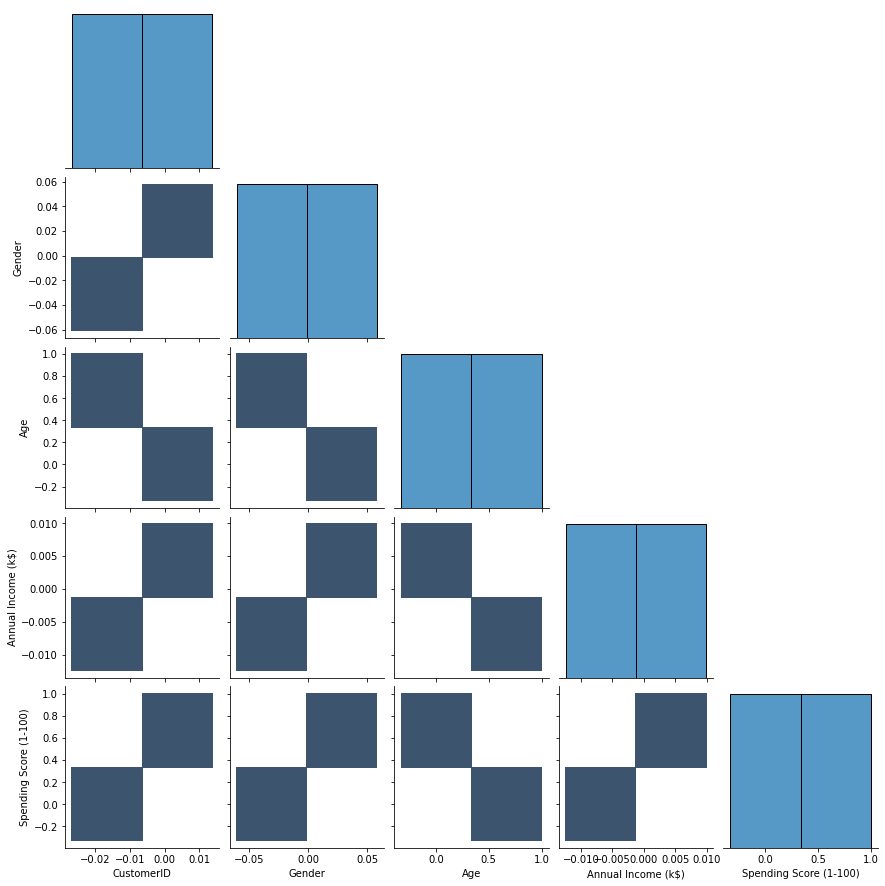

In [ ]:
sns.pairplot(chk_df, kind="hist", corner=True)

corr한 것에 'Age', 'Spending Score (1-100)'를 적용한 뒤, 다시 hist로 출력을 하니까 이상한 값이 나옴...

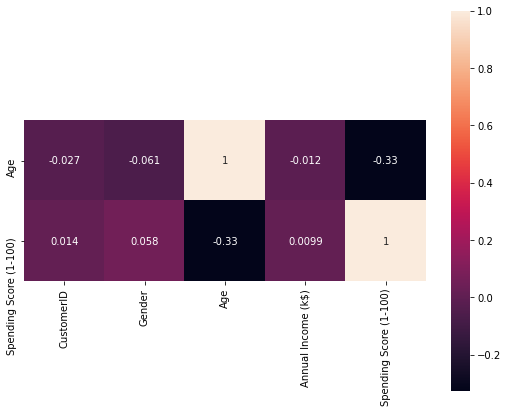

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(
    chk_df.T, annot=True, square=True, palette = ''
    #cbar=True, cbar_kws=dict(shrink=.75), bins=30, discrete=(True, False),
)

Age, Spending Score에 대한 heatmap을 확인하라는 문제로 해석을 해야하는 것인가를 고민했다가... 그럼 굳이 두 칼럼을 지정해서 문제를 제출하지 않았을 것 같다는 생각을 함

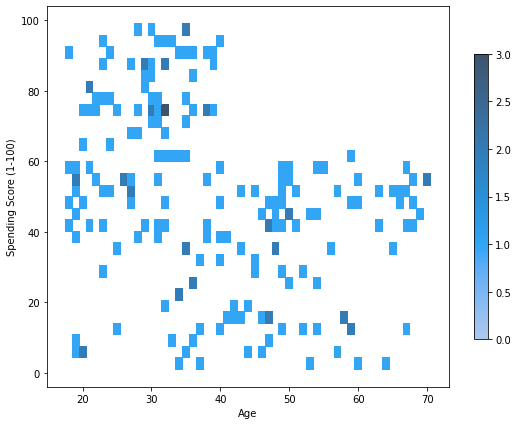

In [ ]:
plt.figure(figsize=(9,7))
sns.histplot(
    df, x="Age", y="Spending Score (1-100)",
    bins=30, discrete=(True, False),
    cbar=True, cbar_kws=dict(shrink=.75),
)

나이대(혹은 연령대 별) 소비 지수에 대한 상관관계를 보기 위해 문제를 출제한 것인가? 하는 고민으로 다시 그린 그림을 통해, 높은 소비 지수에는 40대 미만이 많은 것 같다는 것을 확인함

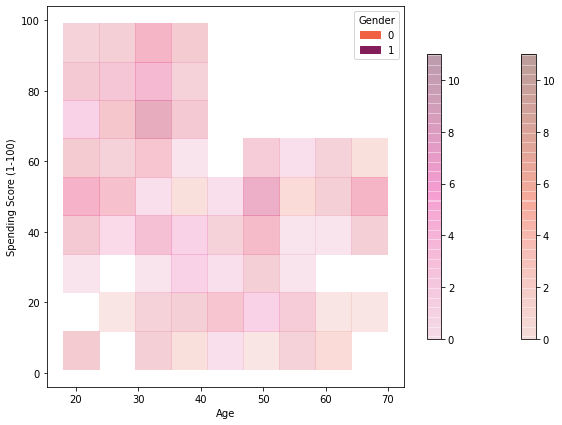

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(df, x="Age", y="Spending Score (1-100)", hue="Gender", palette='rocket_r',
             cbar=True, cbar_kws=dict(shrink=.75), alpha=0.3)

소비 지수 50점 정도의 구간과 30대 초중반의 경우 남녀의 성비가 고르게 분포된 것 처럼 보이는데 자세한 확인이 필요할 것 같음

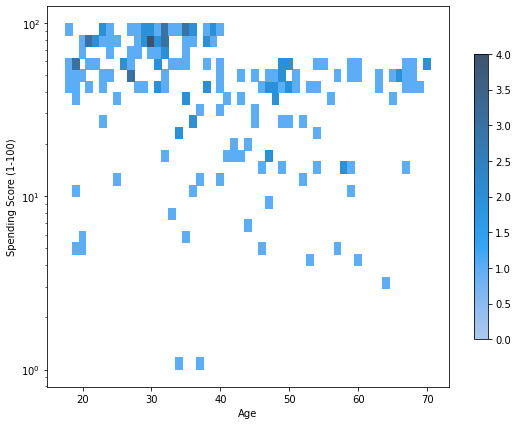

In [ ]:
plt.figure(figsize=(9,7))
sns.histplot(
    df, x="Age", y="Spending Score (1-100)",
    bins=30, discrete=(True, False), log_scale=(False, True),
    cbar=True, cbar_kws=dict(shrink=.75),
)

굳이 log를 취할 필요는 없을 것 같음

## Q4. K-mean을 Eblow method을 적용하고 결과를 해석하시오.

In [ ]:
!pip install yellowbrick

In [ ]:
df.shape

(200, 6)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=6, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

죄송한데...공식 문서를 봐도 단시간에 못 풀겠어요ㅠㅠㅠ

## Q5. DBSCAN을 적용하고 결과를 해석하시오.

# 빅데이터 활용 기획
-- Def & Class(Q1toQ5)

Rule : 내장 함수 사용 시 0점

* split
* replace
* len
* append
* pop

허용하지만,,, 안 쓰는 방법을 고민해보기

* abs()
* all()
* any()
* ascii()
* bin()
* bool()
* breakpoint()
* bytearray()
* bytes()
* callable()
* chr()
* classmethod()
* compile()
* complex()
* delattr()
* dict()
* dir()
* divmod()
* enumerate()
* eval()
* exec()
* filter()
* float()
* format()
* frozenset()
* getattr()
* globals()
* hasattr()
* hash()
* help()
* hex()
* id()
* input()
* int()
* isinstance()
* issubclass()
* iter()
* len()
* list()
* locals()
* map()
* max()
* memoryview()
* min()
* next()
* object()
* oct()
* open()
* ord()
* pow()
* print()
* property()
* range()
* repr()
* reversed()
* round()
* set()
* setattr()
* slice()
* sorted()
* staticmethod()
* str()
* sum()
* super()
* tuple()
* type()
* vars()
* zip()
* __import__()
[python 내장함수 document] https://python.flowdas.com/library/functions.html

## Q1

(하)class로 작성하시오.
주사위 클래스 Dice를 설계하는데 메소드에는 roll()을 구현하여 주사위를 던져 나온 숫자를 화면에 출력하는 프로그램을 작성하시오.
-단, 난수의 발생은 다음을 이용하라.
- face = random.randint(1, 6)

In [ ]:
import random
import time

class Dice():

  def __init__(self, P1, SAW="SAW", P1_Dice=None, SAW_Dice=None):
    self.stranger = SAW
    self.player = P1
    self.face = P1_Dice
    self.game = SAW_Dice
    print(f"{self.stranger} : 자, 지금부터 게임을 시작하지")

  def winlose(self):#, stranger, player):
    if self.face>self.game:
      print("니가 이겼군...산낙지 먹으러 갈래?")
    elif self.face<self.game:
      print(f"{self.player}... 코딩이 하고 싶어? 당장 노트북 켜")
    else:
      print("비겼으니 한 판 더 진행해야겠어")

  def roll(self):
    print(f"{self.player}... 니가 던진 주사위가 굴러가고 있어.")
    time.sleep(3)
    self.face = random.randint(1, 6)
    print(f"{self.player}(이)가 던진 주사위 숫자 : {self.face}")
  
  def turn(self):
    print(f"{self.stranger} : 내가 이기면,,,")
    time.sleep(1)
    print(f"{self.stranger} : 군만두만 먹을 각오로 프로젝트에 집중하도록 해")
    time.sleep(3)
    self.game = random.randint(1, 6)
    print(f"{self.stranger}(이)가 던진 주사위 숫자 : {self.game}")

In [ ]:
G1 = Dice("Ashbee") 

SAW : 자, 지금부터 게임을 시작하지


In [ ]:
G1.roll()

Ashbee... 니가 던진 주사위가 굴러가고 있어.
Ashbee(이)가 던진 주사위 숫자 : 4


In [ ]:
G1.turn()

SAW : 내가 이기면,,,
SAW : 군만두만 먹을 각오로 프로젝트에 집중하도록 해
SAW(이)가 던진 주사위 숫자 : 4


In [ ]:
G1.winlose()

비겼으니 한 판 더 진행해야겠어


## Q2

(상) 배스킨라빈스 31게임.
<게임규칙>
게의 참여자들은 차례를 정해 1부터 31까지의 수를 순차적으로 부른다. 한번에 1~3개까지 수를 연달아 부를 수 있으며, 마지막 31을 부른 사람이 진다.
- 컴퓨터가 무조건 먼저 시작하고,1P는 무조건 2번째로 말한다.컴퓨터가 무조건 이기게 만들어라.


<힌트 1> 4n-2라는 공식을 사용하면 됩니다.


<힌트 2>이 게임은 31을 부르면 지는 게임이니 30을 부르면 이깁니다.

In [ ]:
taste = [flaver for flaver in range(1, 32)]
computer = 2
player = 0
turn = 0

while True:
  if turn==0:
    for comp in range(computer):
      print(f"\tcomputer : {taste.pop(0)}")
      turn+=1
  elif len(taste)>1:
    try:
      player = int(input("연달아 부를 숫자의 횟수(가능 범위 : 1~3회) : "))

      if (player<0) or (player>3):
        print("가능한 범위의 숫자만 입력해주세요.")
        
      else:
        for cnt in range(player):
          print(f"\t1P : {taste.pop(0)}")
        computer = 4-player
        for cnt in range(computer):
          print(f"\tcomputer : {taste.pop(0)}")
        turn += 1
        
    except:
      print("(단호)\t정수만 입력이 가능합니다.\t(단호)")
  elif len(taste)==1:
    print("You Lose!")
    break

computer : 1
computer : 2
연달아 부를 숫자의 횟수(가능 범위 : 1~3회)는? 2
1P : 3
1P : 4
computer : 5
computer : 6
연달아 부를 숫자의 횟수(가능 범위 : 1~3회)는? 4
가능한 범위의 숫자만 입력해주세요.
연달아 부를 숫자의 횟수(가능 범위 : 1~3회)는? 3
1P : 7
1P : 8
1P : 9
computer : 10
연달아 부를 숫자의 횟수(가능 범위 : 1~3회)는? 3.5
문자나 실수가 아닌 정수만 입력이 가능합니다.
연달아 부를 숫자의 횟수(가능 범위 : 1~3회)는? sdf
문자나 실수가 아닌 정수만 입력이 가능합니다.
연달아 부를 숫자의 횟수(가능 범위 : 1~3회)는? ㅇㄹㄴ
문자나 실수가 아닌 정수만 입력이 가능합니다.
연달아 부를 숫자의 횟수(가능 범위 : 1~3회)는? 2
1P : 11
1P : 12
computer : 13
computer : 14
연달아 부를 숫자의 횟수(가능 범위 : 1~3회)는? 1
1P : 15
computer : 16
computer : 17
computer : 18
연달아 부를 숫자의 횟수(가능 범위 : 1~3회)는? 4
가능한 범위의 숫자만 입력해주세요.
연달아 부를 숫자의 횟수(가능 범위 : 1~3회)는? 2
1P : 19
1P : 20
computer : 21
computer : 22
연달아 부를 숫자의 횟수(가능 범위 : 1~3회)는? 3
1P : 23
1P : 24
1P : 25
computer : 26
연달아 부를 숫자의 횟수(가능 범위 : 1~3회)는? 1
1P : 27
computer : 28
computer : 29
computer : 30
You Lose!


## Q3

(중) 내용에 맞게 코드를 작성하시오.
괄호 문자열(Parenthesis String, PS)은 두 개의 괄호 기호인 ‘(’ 와 ‘)’ 만으로 구성되어 있는 문자열이다. 그 중에서 괄호의 모양이 바르게 구성된 문자열을 올바른 괄호 문자열(Valid PS, VPS)이라고 부른다. 한 쌍의 괄호 기호로 된 “( )” 문자열은 기본 VPS 이라고 부른다. 만일 x 가 VPS 라면 이것을 하나의 괄호에 넣은 새로운 문자열 “(x)”도 VPS 가 된다. 그리고 두 VPS x 와 y를 접합(concatenation)시킨 새로운 문자열 xy도 VPS 가 된다. 예를 들어 “(())()”와 “((()))” 는 VPS 이지만 “(()(”, “(())()))” , 그리고 “(()” 는 모두 VPS 가 아닌 문자열이다. 
여러분은 입력으로 주어진 괄호 문자열이 VPS 인지 아닌지를 판단해서 그 결과를 YES 와 NO 로 나타내어야 한다.

In [ ]:
import re

PS = input()
PS = re.sub("[a-zA-Zㄱ-힣\d]", "", PS)
VPSorNOT = [letter for letter in PS]

while True:
  if len(VPSorNOT)%2==1:
    print("NO")
    break
  elif len([chk for chk in VPSorNOT if "("==chk])!=len([chk2 for chk2 in VPSorNOT if ")"==chk2]):
    print("NO")
    break
  else:
    half = len(VPSorNOT)//2
    cnt = 0

    for repeat in range(half):
      if (cnt==half) and (len(VPSorNOT)==0):
        print("YES")
        break
      elif (cnt==half) and (len(VPSorNOT)>0):
        print("NO")
        break

      if VPSorNOT[:2]=='()':
        VPSorNOT = VPSorNOT[2:]
        cnt += 1
      elif VPSorNOT[-2:]=='()':
        VPSorNOT = VPSorNOT[:-2]
        cnt += 1
      elif (VPSorNOT[0]=='(') and (VPSorNOT[-1]==')'):
        VPSorNOT = VPSorNOT[1:-1]
        cnt += 1
      else:
        cnt += 1

((dfdDD))(df123)


KeyboardInterrupt: ignored

## Q4

[하]사칙연산은 Class로 작성하시오.
주의) 내장함수를 사용하면 copy(0점)로 간주.
- 생성자도 호출하시오.

In [ ]:
class Calculator_only4():

  def __init__(self, num_a, num_b):
    self.nA = num_a
    self.nB = num_b
  
  def cal_PLUS(self):
    calP = self.nA + self.nB
    print(f"{self.nA} + {self.nB} = {calP}")
    return calP

  def cal_MINUS(self):
    calM = self.nA - self.nB
    print(f"{self.nA} - {self.nB} = {calM}")
    return calM

  def cal_MULTIPLY(self):
    calMTP = self.nA * self.nB
    print(f"{self.nA} * {self.nB} = {calMTP}")
    return calMTP

  def cal_DIVIDE(self):
    calD = self.nA / self.nB
    print(f"{self.nA} / {self.nB} = {calD}")
    return calD  

In [ ]:
cal4way = Calculator_only4(7, 28)
plus = cal4way.cal_PLUS()

7 + 28 = 35


In [ ]:
# 머리 아플 때 재미로 짤 코드ㅋㅋㅋㅋㅋㅋ뭔가 class는 아직 어려움

# import time

# class Calculator_only4():

#   def __init__(self, num_a, num_b):
#     self.nA = num_a
#     self.nB = num_b
  
#   def cal_PLUS(self):
#     # print(f"{self.nA} + {self.nB}=?")
#     calP = self.nA + self.nB
#     return calP

#   def cal_MINUS(self):
#     # print(f"{self.nA} - {self.nB}=?")
#     calM = self.nA - self.nB
#     return calM

#   def cal_MULTIPLE(self):
#     # print(f"{self.nA} * {self.nB}=?")
#     calMTP = self.nA * self.nB
#     return calMTP

#   def cal_DIVIDE(self):
#     # print(f"{self.nA} / {self.nB}=?")
#     calD = self.nA / self.nB
#     return calD            

#   def cal_Print(calP=None, calM=None, calMTP=None, calD=None):
#     if calP==None and calM==None and calMTP==None and calD==None:
#       print("어떤 사칙 연산을 쓸 건가?")
#     elif calP!=None:
#       print("머리로 얼른 생각해봐!!!!!!!")
#       time.sleep(random.randint(5,10))
#       print(f"덧셈이 어려워???\n답은 {calP}야")

#     elif calM!=None:
#       print("너도 머리가 있잖아!!!!!!!")
#       time.sleep(random.randint(5,10))
#       print(f"겨우 뺄셈 가지고...\n답은 {calM}야")

#     elif calMTP!=None:
#       if len(str(calMTP))<=3:
#         print("머리로도 곱하고 있는 거 맞지???")
#         time.sleep(random.randint(5,10))
#         print(f"어렵지 않은 곱셈인데...\n답은 {calMTP}야")
#       else:
#         print(f"솔직히 이건 계산기가 빠름ㅋㅋㅋ\n답은 {calMTP}야")

#     elif calD!=None:
#       if len(str(calD))<=5:
#         print("시간을 더 줄테니 한 번 풀어봐")
#         time.sleep(random.randint(10,15))
#         print(f"ㅎ..ㅎㅎ...\n답은 {calD}야")
#       else:
#         print(f"고생많았다\n답은 {calD}야")        


In [ ]:
cal4way = Calculator_only4(7, 28)
plus = cal4way.cal_PLUS()
cal4way.cal_Print(plus)

머리로 얼른 생각해봐!!!!!!!
덧셈이 어려워???
답은 <__main__.Calculator_only4 object at 0x7f4a5b47c350>야


## Q5

[중] 업다운 게임을 작성하시오
소주 병뚜껑에서 1-50까지의 숫자를 말하면 Up또는 Down을 알려주는 코드를 작성하시오.
5번안에 맞추지 않으면 Game over도 출력하시오.

In [ ]:
import random

def SoJu_UpDown():
  soju_num = random.randint(1,50)
  soju_nlst = [no for no in range(1, 51)]
  cnt = 0
  num_bucket = []
  player = input("당신은 이름은 무엇입니까? ")
  pause = time.sleep(random.randint(2,5))

  while True:
    try : 
      tried = int(input('1~50까지의 숫자(정수)를 입력하세요.(이전에 입력한 값 제외) : '))

      if cnt==5:
        print(f"\n\n정답은~~~ {soju_num}!!!")
        print(f"\nGame Over{pause}\n아, 못 맞춰도 마셔야지?ㅋㅋㅋ\n{player}(이)가 술을 마셔!")
        print(f"\n{player[:1]}! 짝짝! 짝짝!{pause}\n{player[1:2]}! 짝짝! 짝짝!{pause}\n{player[2:]}!!! 아~ 원~샷! 투~샷!")
        break

      elif (tried<1) or (tried>50):
        print("제발 범위 안에서만 입력해주세요ㅠㅠㅠ")
      
      elif tried in num_bucket:
        print("이전에 입력한 값은 제외라니까, 벌써 술 취했나??")

      elif tried==soju_num:
        print('\n\n*축 당첨*\n아! 마셔 마셔~ 먹고 D져~ B신 B신~ 네 발로 기어라~@&^*_&%')
        break
      
      elif tried>=soju_num:
        print('Down!')
        cnt += 1
        num_bucket.append(tried)
      
      elif tried<=soju_num:
        print('Up!')
        cnt += 1
        num_bucket.append(tried) 
      
    except:
      print("정수만 입력하라고ㅋㅋㅋㅋㅋ")    

In [ ]:
SoJu_UpDown()

당신은 이름은 무엇입니까? 김수빈
1~50까지의 숫자(정수)를 입력하세요.(이전에 입력한 값 제외) : 3
Up!
1~50까지의 숫자(정수)를 입력하세요.(이전에 입력한 값 제외) : 8
Down!
1~50까지의 숫자(정수)를 입력하세요.(이전에 입력한 값 제외) : 10
Down!
1~50까지의 숫자(정수)를 입력하세요.(이전에 입력한 값 제외) : 5
Down!
1~50까지의 숫자(정수)를 입력하세요.(이전에 입력한 값 제외) : ㅇㄹ
정수만 입력하라고ㅋㅋㅋㅋㅋ
1~50까지의 숫자(정수)를 입력하세요.(이전에 입력한 값 제외) : dfe
정수만 입력하라고ㅋㅋㅋㅋㅋ
1~50까지의 숫자(정수)를 입력하세요.(이전에 입력한 값 제외) : 4.5
정수만 입력하라고ㅋㅋㅋㅋㅋ
1~50까지의 숫자(정수)를 입력하세요.(이전에 입력한 값 제외) : 4,5
정수만 입력하라고ㅋㅋㅋㅋㅋ
1~50까지의 숫자(정수)를 입력하세요.(이전에 입력한 값 제외) : 4
*축 당첨*
아! 마셔 마셔~ 먹고 D져~ B신 B신~ 네 발로 기어라~@&^*_&%
